# Peso del sector primario en el PIB de Castilla y León

**MODELO AUTORREGRESIVO**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install skforecast
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.3/558.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datos_vab.xlsx to datos_vab.xlsx
User uploaded file "datos_vab.xlsx" with length 10180 bytes


In [ ]:
#datos

datos_vab=pd.read_excel("/content/datos_vab.xlsx")
datos_vab

,periodo,porcentaje
0,2010-04-01,0.047490
1,2010-07-01,0.043487
2,2010-10-01,0.047459
3,2011-01-01,0.050284
4,2011-04-01,0.051203
5,2011-07-01,0.048228
6,2011-10-01,0.046662
7,2012-01-01,0.048047
8,2012-04-01,0.045685
9,2012-07-01,0.043897


In [ ]:
datos_vab['periodo'] = pd.to_datetime(datos_vab['periodo'], format='%Y-%m-%d')
datos_vab = datos_vab.set_index('periodo')
datos_vab = datos_vab.asfreq('QS')
datos_vab = datos_vab.sort_index()
datos_vab

,porcentaje
periodo,
2010-04-01,0.047490
2010-07-01,0.043487
2010-10-01,0.047459
2011-01-01,0.050284
2011-04-01,0.051203
2011-07-01,0.048228
2011-10-01,0.046662
2012-01-01,0.048047
2012-04-01,0.045685


In [ ]:
#separamos datos en train y test

pasos=6
datos_vab_train = datos_vab[:-pasos]
datos_vab_test  = datos_vab[-pasos:]

print(f"Fechas train : {datos_vab_train.index.min()} --- {datos_vab_train.index.max()}  (n={len(datos_vab_train)})")
print(f"Fechas test  : {datos_vab_test.index.min()} --- {datos_vab_test.index.max()}  (n={len(datos_vab_test)})")

fig, ax = plt.subplots(figsize=(10, 5))
datos_vab_train['porcentaje'].plot(ax=ax, label='train')
datos_vab_test['porcentaje'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
# Optimización de hiperparámetros
# ==============================================================================
steps = 6
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=1),
                lags      = 4 # Este valor será remplazado en el grid search
             )

# Valores candidatos de lags
lags_grid = [4,6,8,10,12,14,16]

# Valores candidatos de hiperparámetros del regresor
param_grid = {'n_estimators': [100, 250, 500],
              'max_depth': [3, 5, 10,15,20]}

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_vab_train['porcentaje'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_vab_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        n_jobs             = 'auto',
                        verbose            = False
                  )

In [ ]:
resultados_grid

In [ ]:
forecaster

In [ ]:
predicciones = forecaster.predict(steps=steps)

In [ ]:
# Gráfico de predicciones vs valores reales

fig, ax = plt.subplots(figsize=(10, 5))
(datos_vab_train['porcentaje']*100).plot(ax=ax, label='train')
(datos_vab_test['porcentaje']*100).plot(ax=ax, label='test')
(predicciones*100).plot(ax=ax, label='predicciones')
plt.xlabel('Periodo')
plt.ylabel('Peso sector primario (%)')
ax.legend();

In [ ]:
forecaster.predict(steps=6)

In [ ]:
forecaster.predict(steps=10)

In [ ]:
predicciones = forecaster.predict(steps=10)

In [ ]:
# Gráfico de predicciones vs valores reales

fig, ax = plt.subplots(figsize=(10, 5))
datos_vab_train['porcentaje'].plot(ax=ax, label='train')
datos_vab_test['porcentaje'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

**LSTM**

In [ ]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(serie, tr_size=40, vl_size=8, ts_size=8 ):
    # Definir número de datos en cada subserie
    N = len(serie)
    Ntrain = int(tr_size)  # Número de datos de entrenamiento
    Nval = int(vl_size)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(datos_vab['porcentaje'])

print(f'Tamaño set de entrenamiento: {len(tr)}')
print(f'Tamaño set de validación: {len(vl)}')
print(f'Tamaño set de prueba: {len(ts)}')

Tamaño set de entrenamiento: 40
Tamaño set de validación: 8
Tamaño set de prueba: 8


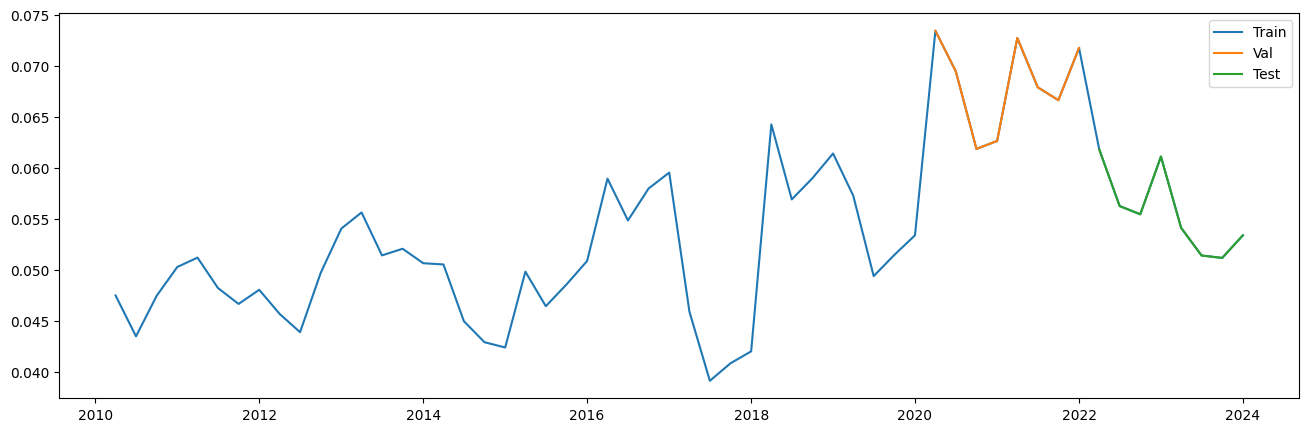

In [ ]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(datos_vab['porcentaje'], label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend();

In [ ]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    filas=len(array)

    # Generar los arreglos
    for i in range((filas-input_length-output_length)+1):
        X.append(array[i:i+INPUT_LENGTH])
        Y.append(array[i+input_length:i+input_length+output_length].reshape(output_length))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 4    # Posteriormente afinaremos este hiperparámetro
OUTPUT_LENGTH = 4   # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH) y de salida (BATCHES x OUTPUT_LENGTH)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH) y de salida (BATCHES x OUTPUT_LENGTH)
Set de entrenamiento - x_tr: (33, 4), y_tr: (33, 4)
Set de validación - x_vl: (1, 4), y_vl: (1, 4)
Set de prueba - x_ts: (1, 4), y_ts: (1, 4)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(1)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr.shape[1],1) # 24 (horas) x 1 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 150 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr,
    y = y_tr,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl, y_vl),
    verbose=2
)

Epoch 1/150
1/1 - 3s - loss: 0.0502 - val_loss: 0.0678 - 3s/epoch - 3s/step
Epoch 2/150
1/1 - 0s - loss: 0.0493 - val_loss: 0.0672 - 48ms/epoch - 48ms/step
Epoch 3/150
1/1 - 0s - loss: 0.0487 - val_loss: 0.0666 - 60ms/epoch - 60ms/step
Epoch 4/150
1/1 - 0s - loss: 0.0482 - val_loss: 0.0662 - 48ms/epoch - 48ms/step
Epoch 5/150
1/1 - 0s - loss: 0.0477 - val_loss: 0.0657 - 52ms/epoch - 52ms/step
Epoch 6/150
1/1 - 0s - loss: 0.0473 - val_loss: 0.0653 - 40ms/epoch - 40ms/step
Epoch 7/150
1/1 - 0s - loss: 0.0469 - val_loss: 0.0649 - 44ms/epoch - 44ms/step
Epoch 8/150
1/1 - 0s - loss: 0.0466 - val_loss: 0.0646 - 42ms/epoch - 42ms/step
Epoch 9/150
1/1 - 0s - loss: 0.0462 - val_loss: 0.0642 - 43ms/epoch - 43ms/step
Epoch 10/150
1/1 - 0s - loss: 0.0458 - val_loss: 0.0639 - 49ms/epoch - 49ms/step
Epoch 11/150
1/1 - 0s - loss: 0.0455 - val_loss: 0.0635 - 41ms/epoch - 41ms/step
Epoch 12/150
1/1 - 0s - loss: 0.0452 - val_loss: 0.0632 - 71ms/epoch - 71ms/step
Epoch 13/150
1/1 - 0s - loss: 0.0449 - va

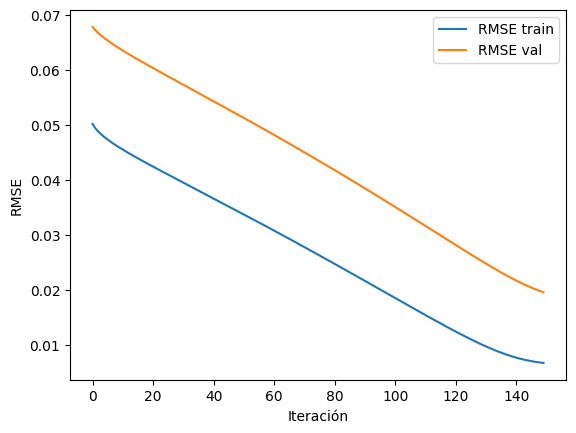

In [ ]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr, y=y_tr, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl, y=y_vl, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts, y=y_ts, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.007
  RMSE val:	 0.020
  RMSE test:	 0.003


In [ ]:
 y_pred = modelo.predict(x_ts,verbose=0)

In [ ]:
N = len(y_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)
# Cálculo de errores simples
errores = y_ts.flatten()-y_pred.flatten()
plt.plot(errores);


In [ ]:
x_ts

In [ ]:
y_pred

In [ ]:
y_ts

In [ ]:
errores

In [ ]:
 y_pred = modelo.predict(x_vl,verbose=0)

In [ ]:
 y_pred = modelo.predict(x_ts,verbose=0)

In [ ]:
x_test=[[0.066631,0.071752,0.061810,0.056256]]
y_pred = modelo.predict(x_test,verbose=0)
y_pred

In [ ]:
x_pred=[[0.055874,0.054438,0.056433,0.054487]]
y_pred = modelo.predict(x_pred,verbose=0)
y_pred

In [ ]:
#datos

datos_lstm=pd.read_excel("/content/datos_lstm.xlsx")
datos_lstm

In [ ]:
datos_lstm['periodo'] = pd.to_datetime(datos_lstm['periodo'], format='%Y-%m-%d')
datos_lstm = datos_lstm.set_index('periodo')
datos_lstm = datos_lstm.asfreq('QS')
datos_lstm = datos_lstm.sort_index()
datos_lstm

In [ ]:
# Gráfico de predicciones vs valores reales

fig, ax = plt.subplots(figsize=(10, 5))
(datos_lstm['porcentaje'][0:49]*100).plot(ax=ax, label='train')
(datos_lstm['porcentaje'][50:55]*100).plot(ax=ax, label='test')
(datos_lstm['porcentaje'][56:]*100).plot(ax=ax, label='predicciones')
plt.xlabel('Periodo')
plt.ylabel('Peso sector primario (%)')
ax.legend();

# Número de ocupados en el sector primario de Castilla y León



**MODELO AUTORREGRESIVO**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install skforecast
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.3/558.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datos_ocupados.xlsx to datos_ocupados.xlsx
User uploaded file "datos_ocupados.xlsx" with length 10002 bytes


In [ ]:
#datos

datos_ocupados=pd.read_excel("/content/datos_maiz.xlsx")
datos_ocupados["ocupados"]=datos_ocupados["ocupados"]

In [ ]:
datos_ocupados['periodo'] = pd.to_datetime(datos_ocupados['periodo'], format='%Y-%m-%d')
datos_ocupados = datos_ocupados.set_index('periodo')
datos_ocupados = datos_ocupados.asfreq('QS')
datos_ocupados = datos_ocupados.sort_index()
datos_ocupados

,ocupados
periodo,
2010-04-01,0.358744
2010-07-01,0.443946
2010-10-01,0.515695
2011-01-01,0.515695
2011-04-01,0.524664
2011-07-01,0.641256
2011-10-01,0.542601
2012-01-01,0.506726
2012-04-01,0.493274


Fechas train : 2010-04-01 00:00:00 --- 2022-07-01 00:00:00  (n=50)
Fechas test  : 2022-10-01 00:00:00 --- 2024-01-01 00:00:00  (n=6)


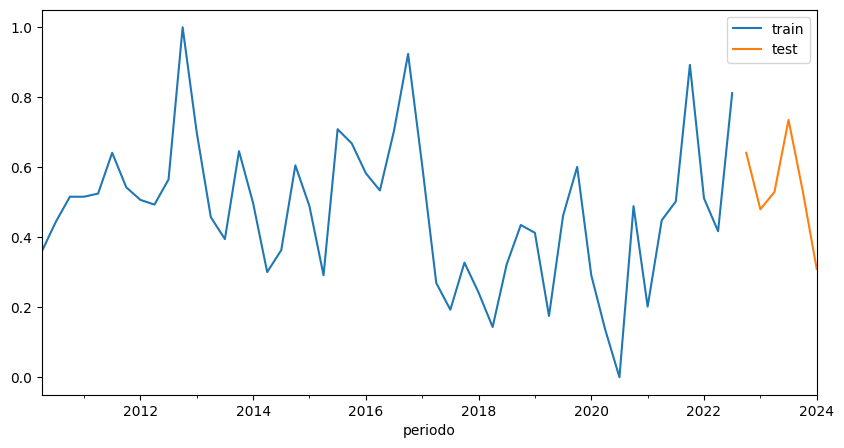

In [ ]:
#separamos datos en train y test

pasos=6
datos_ocupados_train = datos_ocupados[:-pasos]
datos_ocupados_test  = datos_ocupados[-pasos:]

print(f"Fechas train : {datos_ocupados_train.index.min()} --- {datos_ocupados_train.index.max()}  (n={len(datos_ocupados_train)})")
print(f"Fechas test  : {datos_ocupados_test.index.min()} --- {datos_ocupados_test.index.max()}  (n={len(datos_ocupados_test)})")

fig, ax = plt.subplots(figsize=(10, 5))
datos_ocupados_train['ocupados'].plot(ax=ax, label='train')
datos_ocupados_test['ocupados'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
# Optimización de hiperparámetros
# ==============================================================================
steps = 6
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=1),
                lags      = 4 # Este valor será remplazado en el grid search
             )

# Valores candidatos de lags
lags_grid = [4,6,8,10,12,14,16]

# Valores candidatos de hiperparámetros del regresor
param_grid = {'n_estimators': [100, 250, 500],
              'max_depth': [3, 5, 10,15,20]}

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_ocupados_train['ocupados'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_ocupados_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        n_jobs             = 'auto',
                        verbose            = False
                  )

Number of models compared: 105.


lags grid:   0%|          | 0/7 [00:00<?, ?it/s]

params grid:   0%|          | 0/15 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
resultados_grid

,lags,lags_label,params,mean_squared_error,max_depth,n_estimators
62,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 3, 'n_estimators': 500}",2.957243e+07,3,500
65,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 5, 'n_estimators': 500}",2.969810e+07,5,500
74,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 20, 'n_estimators': 500}",2.970924e+07,20,500
71,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 15, 'n_estimators': 500}",2.970924e+07,15,500
68,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 10, 'n_estimators': 500}",2.970924e+07,10,500
...,...,...,...,...,...,...
47,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",5.170028e+07,3,500
50,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",5.183161e+07,5,500
53,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",5.185030e+07,10,500
56,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 15, 'n_estimators': 500}",5.185030e+07,15,500


In [ ]:
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=3, n_estimators=500, random_state=1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2010-04-01 00:00:00'), Timestamp('2022-07-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: QS-JAN 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-05-07 10:37:28 
Last fit date: 2024-05-07 1

In [ ]:
predicciones = forecaster.predict(steps=steps)

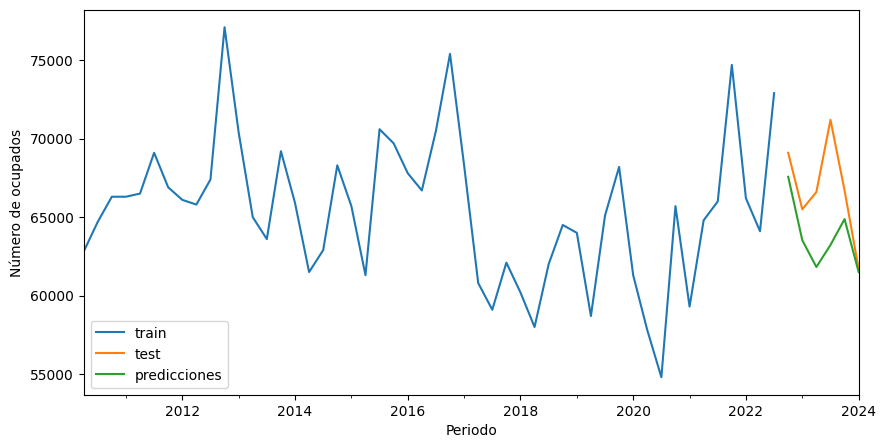

In [ ]:
# Gráfico de predicciones vs valores reales

fig, ax = plt.subplots(figsize=(10, 5))
datos_ocupados_train['ocupados'].plot(ax=ax, label='train')
datos_ocupados_test['ocupados'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
plt.xlabel('Periodo')
plt.ylabel('Número de ocupados')
ax.legend();

In [ ]:
forecaster.predict(steps=6)

2022-10-01    67569.893540
2023-01-01    63529.241063
2023-04-01    61821.549357
2023-07-01    63226.639307
2023-10-01    64874.605404
2024-01-01    61501.540722
Freq: QS-JAN, Name: pred, dtype: float64

In [ ]:
forecaster.predict(steps=10)

2022-10-01    67569.893540
2023-01-01    63529.241063
2023-04-01    61821.549357
2023-07-01    63226.639307
2023-10-01    64874.605404
2024-01-01    61501.540722
2024-04-01    62661.873714
2024-07-01    65370.096153
2024-10-01    64988.860629
2025-01-01    63597.234630
Freq: QS-JAN, Name: pred, dtype: float64

In [ ]:
predicciones = forecaster.predict(steps=10)

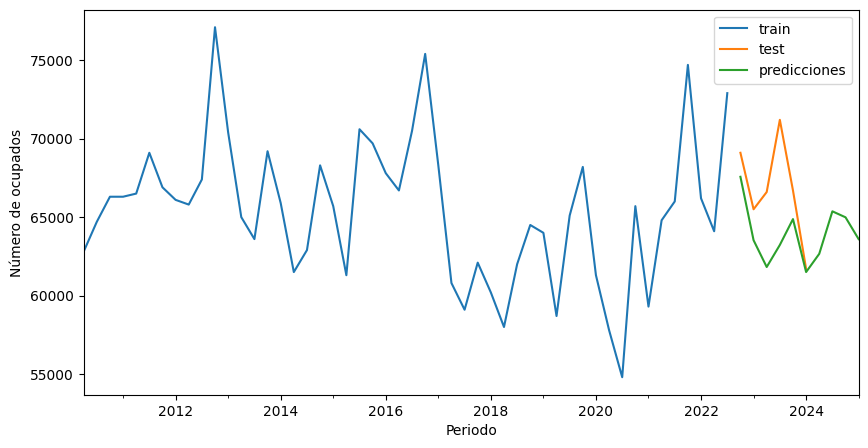

In [ ]:
# Gráfico de predicciones vs valores reales

fig, ax = plt.subplots(figsize=(10, 5))
datos_ocupados_train['ocupados'].plot(ax=ax, label='train')
datos_ocupados_test['ocupados'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
plt.xlabel('Periodo')
plt.ylabel('Número de ocupados')
ax.legend();

**LSTM**

In [ ]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(serie, tr_size=40, vl_size=8, ts_size=8 ):
    # Definir número de datos en cada subserie
    N = len(serie)
    Ntrain = int(tr_size)  # Número de datos de entrenamiento
    Nval = int(vl_size)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(datos_ocupados['ocupados'])

print(f'Tamaño set de entrenamiento: {len(tr)}')
print(f'Tamaño set de validación: {len(vl)}')
print(f'Tamaño set de prueba: {len(ts)}')

Tamaño set de entrenamiento: 40
Tamaño set de validación: 8
Tamaño set de prueba: 8


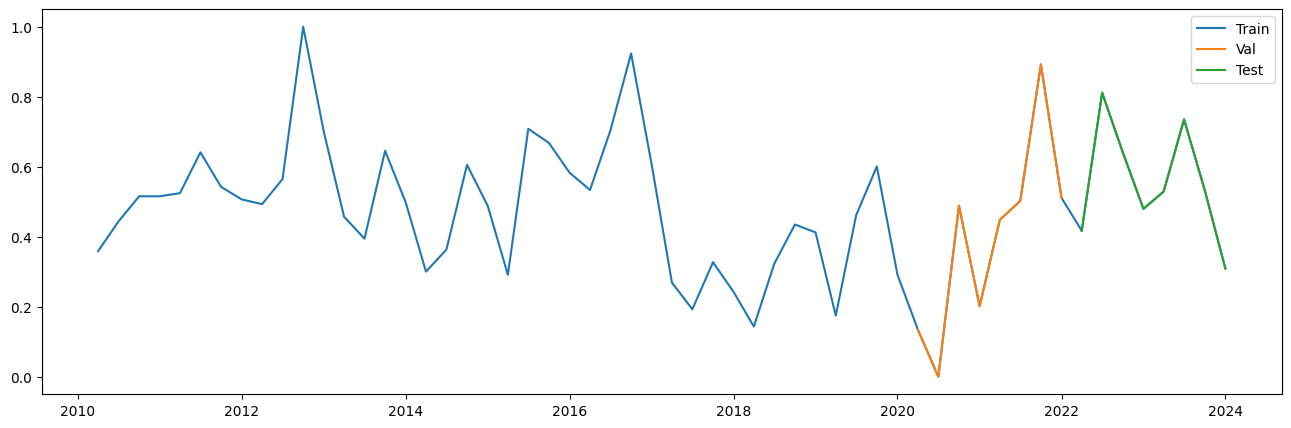

In [ ]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(datos_ocupados['ocupados'], label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend();

In [ ]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    filas=len(array)

    # Generar los arreglos
    for i in range((filas-input_length-output_length)+1):
        X.append(array[i:i+INPUT_LENGTH])
        Y.append(array[i+input_length:i+input_length+output_length].reshape(output_length))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 4    # Posteriormente afinaremos este hiperparámetro
OUTPUT_LENGTH = 4   # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH) y de salida (BATCHES x OUTPUT_LENGTH)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH) y de salida (BATCHES x OUTPUT_LENGTH)
Set de entrenamiento - x_tr: (33, 4), y_tr: (33, 4)
Set de validación - x_vl: (1, 4), y_vl: (1, 4)
Set de prueba - x_ts: (1, 4), y_ts: (1, 4)


In [ ]:
y_tr

array([[0.52466368, 0.64125561, 0.5426009 , 0.50672646],
       [0.64125561, 0.5426009 , 0.50672646, 0.49327354],
       [0.5426009 , 0.50672646, 0.49327354, 0.56502242],
       [0.50672646, 0.49327354, 0.56502242, 1.        ],
       [0.49327354, 0.56502242, 1.        , 0.69955157],
       [0.56502242, 1.        , 0.69955157, 0.4573991 ],
       [1.        , 0.69955157, 0.4573991 , 0.39461883],
       [0.69955157, 0.4573991 , 0.39461883, 0.64573991],
       [0.4573991 , 0.39461883, 0.64573991, 0.49775785],
       [0.39461883, 0.64573991, 0.49775785, 0.30044843],
       [0.64573991, 0.49775785, 0.30044843, 0.3632287 ],
       [0.49775785, 0.30044843, 0.3632287 , 0.60538117],
       [0.30044843, 0.3632287 , 0.60538117, 0.48878924],
       [0.3632287 , 0.60538117, 0.48878924, 0.29147982],
       [0.60538117, 0.48878924, 0.29147982, 0.70852018],
       [0.48878924, 0.29147982, 0.70852018, 0.66816143],
       [0.29147982, 0.70852018, 0.66816143, 0.58295964],
       [0.70852018, 0.66816143,

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(1)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr.shape[1],1) # 24 (horas) x 1 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(float(y_pred)-float(y_true))))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=0.00025)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 250 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr,
    y = y_tr,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl, y_vl),
    verbose=2
)

Epoch 1/250
1/1 - 4s - loss: 0.5377 - val_loss: 0.6141 - 4s/epoch - 4s/step
Epoch 2/250
1/1 - 0s - loss: 0.5288 - val_loss: 0.6096 - 46ms/epoch - 46ms/step
Epoch 3/250
1/1 - 0s - loss: 0.5220 - val_loss: 0.6057 - 52ms/epoch - 52ms/step
Epoch 4/250
1/1 - 0s - loss: 0.5162 - val_loss: 0.6022 - 48ms/epoch - 48ms/step
Epoch 5/250
1/1 - 0s - loss: 0.5109 - val_loss: 0.5990 - 45ms/epoch - 45ms/step
Epoch 6/250
1/1 - 0s - loss: 0.5060 - val_loss: 0.5959 - 46ms/epoch - 46ms/step
Epoch 7/250
1/1 - 0s - loss: 0.5013 - val_loss: 0.5930 - 44ms/epoch - 44ms/step
Epoch 8/250
1/1 - 0s - loss: 0.4968 - val_loss: 0.5901 - 43ms/epoch - 43ms/step
Epoch 9/250
1/1 - 0s - loss: 0.4925 - val_loss: 0.5873 - 48ms/epoch - 48ms/step
Epoch 10/250
1/1 - 0s - loss: 0.4882 - val_loss: 0.5846 - 37ms/epoch - 37ms/step
Epoch 11/250
1/1 - 0s - loss: 0.4841 - val_loss: 0.5819 - 38ms/epoch - 38ms/step
Epoch 12/250
1/1 - 0s - loss: 0.4800 - val_loss: 0.5792 - 40ms/epoch - 40ms/step
Epoch 13/250
1/1 - 0s - loss: 0.4759 - va

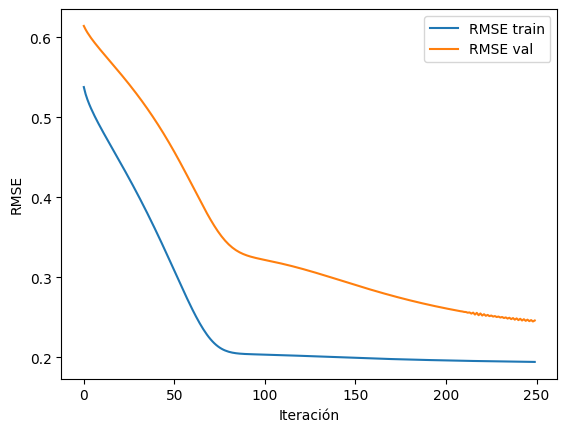

In [ ]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr, y=y_tr, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl, y=y_vl, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts, y=y_ts, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.194
  RMSE val:	 0.246
  RMSE test:	 0.142


In [ ]:
 y_pred = modelo.predict(x_ts,verbose=0)

In [ ]:
y_pred

array([[0.53210634, 0.51711494, 0.5036678 , 0.49004394]], dtype=float32)

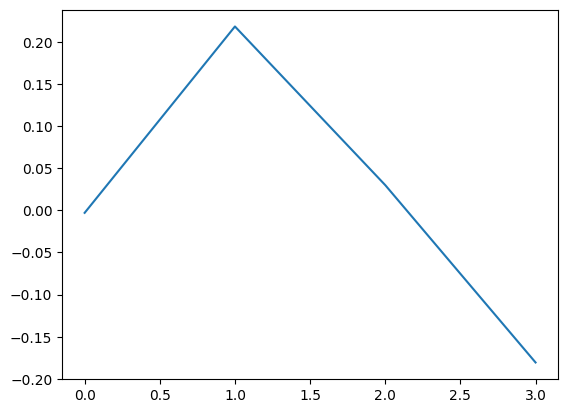

In [ ]:
N = len(y_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)
# Cálculo de errores simples
errores = y_ts.flatten()-y_pred.flatten()
plt.plot(errores);


In [ ]:
x_ts

In [ ]:
y_pred

array([[0.53210634, 0.51711494, 0.5036678 , 0.49004394]], dtype=float32)

In [ ]:
y_ts

array([[0.52914798, 0.73542601, 0.53363229, 0.30941704]])

In [ ]:
errores

In [ ]:
 y_pred = modelo.predict(x_vl,verbose=0)

In [ ]:
 y_pred = modelo.predict(x_ts,verbose=0)

In [ ]:
x_test=[[0.448430,0.502242,0.892377,0.511211]]
y_pred = modelo.predict(x_test,verbose=0)
y_pred

array([[0.5306067 , 0.5100132 , 0.5023123 , 0.49062157]], dtype=float32)

In [ ]:
x_pred=[[0.529148,0.735426,0.533632,0.309417]]
y_pred = modelo.predict(x_pred,verbose=0)
y_pred

array([[0.5051624 , 0.5091316 , 0.49464515, 0.48072106]], dtype=float32)

In [ ]:
#datos

datos_lstm=pd.read_excel("/content/datos_lstm_ocupados.xlsx")
datos_lstm

,periodo,ocupados
0,2010-04-01,62800.0
1,2010-07-01,64700.0
2,2010-10-01,66300.0
3,2011-01-01,66300.0
4,2011-04-01,66500.0
5,2011-07-01,69100.0
6,2011-10-01,66900.0
7,2012-01-01,66100.0
8,2012-04-01,65800.0
9,2012-07-01,67400.0


In [ ]:
datos_lstm['periodo'] = pd.to_datetime(datos_lstm['periodo'], format='%Y-%m-%d')
datos_lstm = datos_lstm.set_index('periodo')
datos_lstm = datos_lstm.asfreq('QS')
datos_lstm = datos_lstm.sort_index()
datos_lstm

,ocupados
periodo,
2010-04-01,62800.0
2010-07-01,64700.0
2010-10-01,66300.0
2011-01-01,66300.0
2011-04-01,66500.0
2011-07-01,69100.0
2011-10-01,66900.0
2012-01-01,66100.0
2012-04-01,65800.0


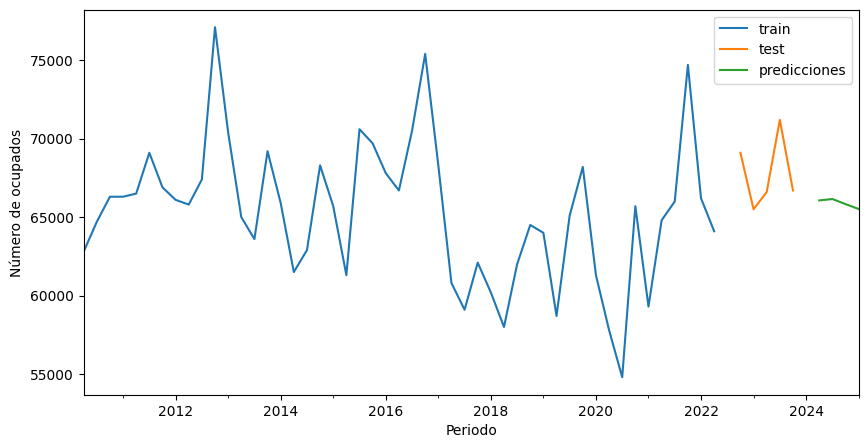

In [ ]:
# Gráfico de predicciones vs valores reales

fig, ax = plt.subplots(figsize=(10, 5))
(datos_lstm['ocupados'][0:49]).plot(ax=ax, label='train')
(datos_lstm['ocupados'][50:55]).plot(ax=ax, label='test')
(datos_lstm['ocupados'][56:]).plot(ax=ax, label='predicciones')
plt.xlabel('Periodo')
plt.ylabel('Número de ocupados')
ax.legend();

# Precio Maíz Castilla y León

**MODELO AUTORREGRESIVO**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install skforecast
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datos_maiz.xlsx to datos_maiz.xlsx
User uploaded file "datos_maiz.xlsx" with length 12940 bytes


In [ ]:
#datos

datos_maiz=pd.read_excel("/content/datos_maiz.xlsx")
datos_maiz

,periodo,precio
0,2015-01-04,170.7
1,2015-01-11,171.1
2,2015-01-18,171.3
3,2015-01-25,171.2
4,2015-02-01,170.5
...,...,...
241,2019-08-18,206.1
242,2019-08-25,204.3
243,2019-09-01,201.5
244,2019-09-08,201.6


In [ ]:
datos_maiz['periodo'] = pd.to_datetime(datos_maiz['periodo'], format='%Y-%m-%d')
datos_maiz = datos_maiz.set_index('periodo')
datos_maiz = datos_maiz.asfreq('W')
datos_maiz = datos_maiz.sort_index()
datos_maiz

,precio
periodo,
2015-01-04,170.7
2015-01-11,171.1
2015-01-18,171.3
2015-01-25,171.2
2015-02-01,170.5
...,...
2019-08-18,206.1
2019-08-25,204.3
2019-09-01,201.5


Fechas train : 2015-01-04 00:00:00 --- 2019-03-17 00:00:00  (n=220)
Fechas test  : 2019-03-24 00:00:00 --- 2019-09-15 00:00:00  (n=26)


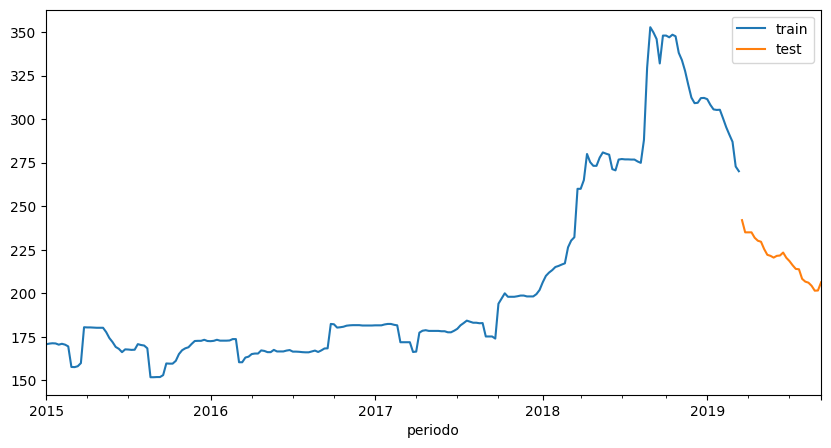

In [ ]:
#separamos datos en train y test

pasos=26
datos_maiz_train = datos_maiz[:-pasos]
datos_maiz_test  = datos_maiz[-pasos:]

print(f"Fechas train : {datos_maiz_train.index.min()} --- {datos_maiz_train.index.max()}  (n={len(datos_maiz_train)})")
print(f"Fechas test  : {datos_maiz_test.index.min()} --- {datos_maiz_test.index.max()}  (n={len(datos_maiz_test)})")

fig, ax = plt.subplots(figsize=(10, 5))
datos_maiz_train['precio'].plot(ax=ax, label='train')
datos_maiz_test['precio'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
# Optimización de hiperparámetros
# ==============================================================================
steps = 26
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=1),
                lags      = 4 # Este valor será remplazado en el grid search
             )

# Valores candidatos de lags
lags_grid = [4,6,8,10,12,14,16]

# Valores candidatos de hiperparámetros del regresor
param_grid = {'n_estimators': [100, 250, 500],
              'max_depth': [3, 5, 10,15,20]}

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_maiz_train['precio'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_maiz_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        n_jobs             = 'auto',
                        verbose            = False
                  )

Number of models compared: 105.


lags grid:   0%|          | 0/7 [00:00<?, ?it/s]

params grid:   0%|          | 0/15 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6] 
  Parameters: {'max_depth': 10, 'n_estimators': 100}
  Backtesting metric: 7178.979526063647



In [ ]:
resultados_grid

,lags,lags_label,params,mean_squared_error,max_depth,n_estimators
21,"[1, 2, 3, 4, 5, 6]","[1, 2, 3, 4, 5, 6]","{'max_depth': 10, 'n_estimators': 100}",7178.979526,10,100
101,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 15, 'n_estimators': 500}",7179.737165,15,500
104,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 20, 'n_estimators': 500}",7179.737579,20,500
100,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 15, 'n_estimators': 250}",7180.852616,15,250
103,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 20, 'n_estimators': 250}",7180.853340,20,250
...,...,...,...,...,...,...
7,"[1, 2, 3, 4]","[1, 2, 3, 4]","{'max_depth': 10, 'n_estimators': 250}",7246.639592,10,250
4,"[1, 2, 3, 4]","[1, 2, 3, 4]","{'max_depth': 5, 'n_estimators': 250}",7247.213679,5,250
5,"[1, 2, 3, 4]","[1, 2, 3, 4]","{'max_depth': 5, 'n_estimators': 500}",7247.386423,5,500
6,"[1, 2, 3, 4]","[1, 2, 3, 4]","{'max_depth': 10, 'n_estimators': 100}",7247.400083,10,100


In [ ]:
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, random_state=1) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2015-01-04 00:00:00'), Timestamp('2019-03-17 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-05-14 10:03:11 
Last fit date: 2024-05-14 10:06:14 
Skforecast version: 0.12.0 
Pytho

In [ ]:
predicciones = forecaster.predict(steps=steps)

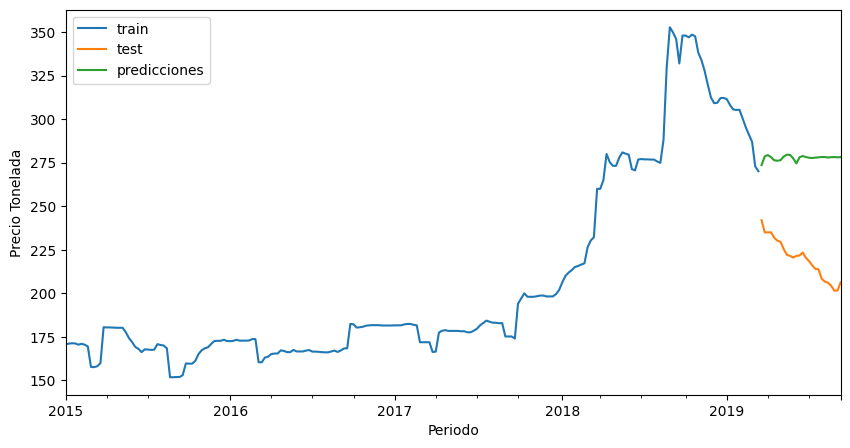

In [ ]:
# Gráfico de predicciones vs valores reales

fig, ax = plt.subplots(figsize=(10, 5))
datos_maiz_train['precio'].plot(ax=ax, label='train')
datos_maiz_test['precio'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
plt.xlabel('Periodo')
plt.ylabel('Precio Tonelada')
ax.legend();

In [ ]:
forecaster.predict(steps=39)

2019-03-24    273.593000
2019-03-31    278.627667
2019-04-07    279.387800
2019-04-14    278.109000
2019-04-21    276.408333
2019-04-28    276.128929
2019-05-05    276.436667
2019-05-12    278.539895
2019-05-19    279.598538
2019-05-26    279.464667
2019-06-02    277.487667
2019-06-09    274.591829
2019-06-16    278.102333
2019-06-23    278.844967
2019-06-30    278.249000
2019-07-07    277.841000
2019-07-14    277.685167
2019-07-21    277.921333
2019-07-28    278.032167
2019-08-04    278.277167
2019-08-11    278.237167
2019-08-18    277.966167
2019-08-25    278.181167
2019-09-01    278.236167
2019-09-08    278.113167
2019-09-15    278.194167
2019-09-22    278.237167
2019-09-29    278.225167
2019-10-06    278.182167
2019-10-13    278.193167
2019-10-20    278.225167
2019-10-27    278.226167
2019-11-03    278.194167
2019-11-10    278.193167
2019-11-17    278.225167
2019-11-24    278.226167
2019-12-01    278.194167
2019-12-08    278.193167
2019-12-15    278.225167
Freq: W-SUN, Name: pred, 

In [ ]:
forecaster.predict(steps=10)

2022-10-01    67569.893540
2023-01-01    63529.241063
2023-04-01    61821.549357
2023-07-01    63226.639307
2023-10-01    64874.605404
2024-01-01    61501.540722
2024-04-01    62661.873714
2024-07-01    65370.096153
2024-10-01    64988.860629
2025-01-01    63597.234630
Freq: QS-JAN, Name: pred, dtype: float64

In [ ]:
predicciones = forecaster.predict(steps=10)

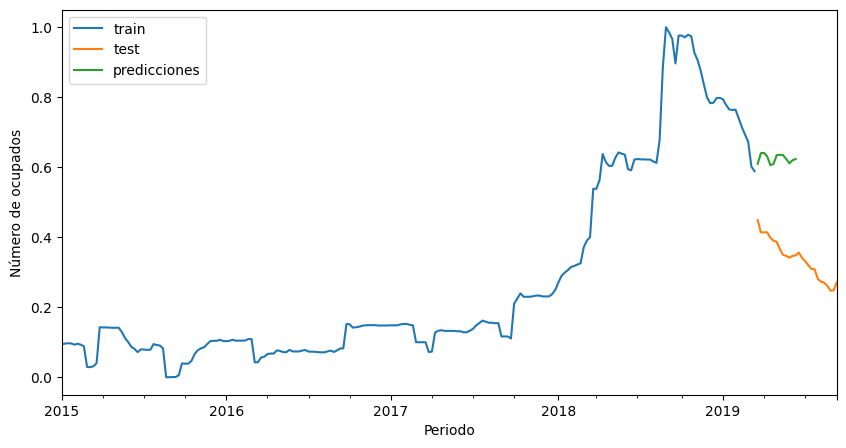

In [ ]:
# Gráfico de predicciones vs valores reales

fig, ax = plt.subplots(figsize=(10, 5))
datos_maiz_train['precio'].plot(ax=ax, label='train')
datos_maiz_test['precio'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
plt.xlabel('Periodo')
plt.ylabel('Número de ocupados')
ax.legend();

**LSTM**

In [ ]:
#datos

datos_maiz_lstm=pd.read_excel("/content/datos_maiz_lstm.xlsx")
datos_maiz_lstm

,periodo,precio
0,2015-01-04,0.094030
1,2015-01-11,0.096020
2,2015-01-18,0.097015
3,2015-01-25,0.096517
4,2015-02-01,0.093035
...,...,...
241,2019-08-18,0.270149
242,2019-08-25,0.261194
243,2019-09-01,0.247264
244,2019-09-08,0.247761


In [ ]:
datos_maiz_lstm['periodo'] = pd.to_datetime(datos_maiz_lstm['periodo'], format='%Y-%m-%d')
datos_maiz_lstm = datos_maiz_lstm.set_index('periodo')
datos_maiz_lstm = datos_maiz_lstm.asfreq('W')
datos_maiz_lstm = datos_maiz_lstm.sort_index()
datos_maiz_lstm

,precio
periodo,
2015-01-04,0.094030
2015-01-11,0.096020
2015-01-18,0.097015
2015-01-25,0.096517
2015-02-01,0.093035
...,...
2019-08-18,0.270149
2019-08-25,0.261194
2019-09-01,0.247264


In [ ]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(serie, tr_size=194, vl_size=26, ts_size=26 ):
    # Definir número de datos en cada subserie
    N = len(serie)
    Ntrain = int(tr_size)  # Número de datos de entrenamiento
    Nval = int(vl_size)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(datos_maiz_lstm['precio'])

print(f'Tamaño set de entrenamiento: {len(tr)}')
print(f'Tamaño set de validación: {len(vl)}')
print(f'Tamaño set de prueba: {len(ts)}')

Tamaño set de entrenamiento: 194
Tamaño set de validación: 26
Tamaño set de prueba: 26


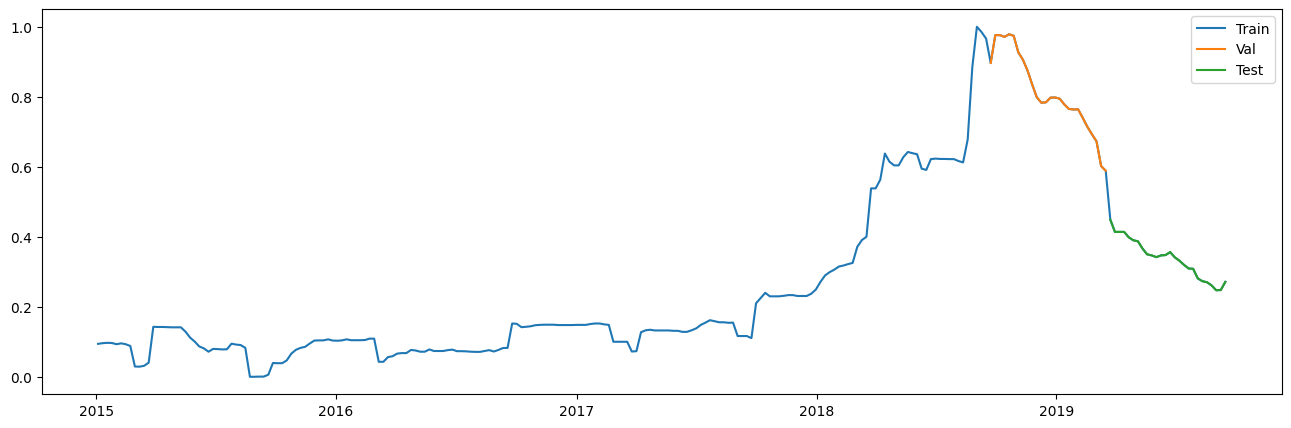

In [ ]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(datos_maiz_lstm['precio'], label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend();

In [ ]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    filas=len(array)

    # Generar los arreglos
    for i in range((filas-input_length-output_length)+1):
        X.append(array[i:i+INPUT_LENGTH])
        Y.append(array[i+input_length:i+input_length+output_length].reshape(output_length))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 13    # Posteriormente afinaremos este hiperparámetro
OUTPUT_LENGTH = 13   # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH) y de salida (BATCHES x OUTPUT_LENGTH)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH) y de salida (BATCHES x OUTPUT_LENGTH)
Set de entrenamiento - x_tr: (169, 13), y_tr: (169, 13)
Set de validación - x_vl: (1, 13), y_vl: (1, 13)
Set de prueba - x_ts: (1, 13), y_ts: (1, 13)


In [ ]:
y_tr

array([[0.14228856, 0.14228856, 0.14179104, ..., 0.08109453, 0.07164179,
        0.07960199],
       [0.14228856, 0.14179104, 0.14129353, ..., 0.07164179, 0.07960199,
        0.07910448],
       [0.14179104, 0.14129353, 0.14129353, ..., 0.07960199, 0.07910448,
        0.07810945],
       ...,
       [0.59452736, 0.59104478, 0.62189055, ..., 0.67810945, 0.8840796 ,
        1.        ],
       [0.59104478, 0.62189055, 0.62338308, ..., 0.8840796 , 1.        ,
        0.98507463],
       [0.62189055, 0.62338308, 0.62238806, ..., 1.        , 0.98507463,
        0.96616915]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(1)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr.shape[1],1) # 24 (horas) x 1 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(float(y_pred)-float(y_true))))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=0.0001)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 125 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr,
    y = y_tr,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl, y_vl),
    verbose=2
)

Epoch 1/125
1/1 - 2s - loss: 0.2628 - val_loss: 0.7503 - 2s/epoch - 2s/step
Epoch 2/125
1/1 - 0s - loss: 0.2610 - val_loss: 0.7460 - 69ms/epoch - 69ms/step
Epoch 3/125
1/1 - 0s - loss: 0.2595 - val_loss: 0.7422 - 62ms/epoch - 62ms/step
Epoch 4/125
1/1 - 0s - loss: 0.2583 - val_loss: 0.7387 - 66ms/epoch - 66ms/step
Epoch 5/125
1/1 - 0s - loss: 0.2571 - val_loss: 0.7354 - 113ms/epoch - 113ms/step
Epoch 6/125
1/1 - 0s - loss: 0.2561 - val_loss: 0.7323 - 96ms/epoch - 96ms/step
Epoch 7/125
1/1 - 0s - loss: 0.2551 - val_loss: 0.7293 - 114ms/epoch - 114ms/step
Epoch 8/125
1/1 - 0s - loss: 0.2541 - val_loss: 0.7263 - 85ms/epoch - 85ms/step
Epoch 9/125
1/1 - 0s - loss: 0.2532 - val_loss: 0.7235 - 90ms/epoch - 90ms/step
Epoch 10/125
1/1 - 0s - loss: 0.2523 - val_loss: 0.7206 - 108ms/epoch - 108ms/step
Epoch 11/125
1/1 - 0s - loss: 0.2514 - val_loss: 0.7179 - 99ms/epoch - 99ms/step
Epoch 12/125
1/1 - 0s - loss: 0.2505 - val_loss: 0.7151 - 103ms/epoch - 103ms/step
Epoch 13/125
1/1 - 0s - loss: 0.2

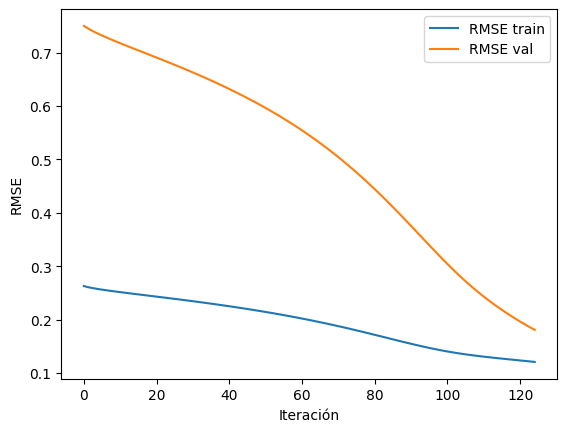

In [ ]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr, y=y_tr, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl, y=y_vl, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts, y=y_ts, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.107
  RMSE val:	 0.181
  RMSE test:	 0.089


In [ ]:
 y_pred = modelo.predict(x_ts,verbose=0)

In [ ]:
x_ts

array([[0.44875622, 0.41393035, 0.41393035, 0.41393035, 0.39850746,
        0.39004975, 0.38706468, 0.36616915, 0.34975124, 0.34676617,
        0.34179104, 0.34676617, 0.34776119]])

In [ ]:
y_pred

array([[0.28745365, 0.3380166 , 0.3106951 , 0.33670568, 0.34591758,
        0.30869883, 0.40348005, 0.28502983, 0.3755956 , 0.33256808,
        0.3554306 , 0.39098182, 0.45029846]], dtype=float32)

In [ ]:
 y_pred = modelo.predict(x_vl,verbose=0)
 y_pred

array([[0.50152355, 0.6113632 , 0.56524575, 0.60115457, 0.6438474 ,
        0.5587143 , 0.75405145, 0.47589508, 0.6781154 , 0.5883445 ,
        0.6241058 , 0.69765687, 0.84912187]], dtype=float32)

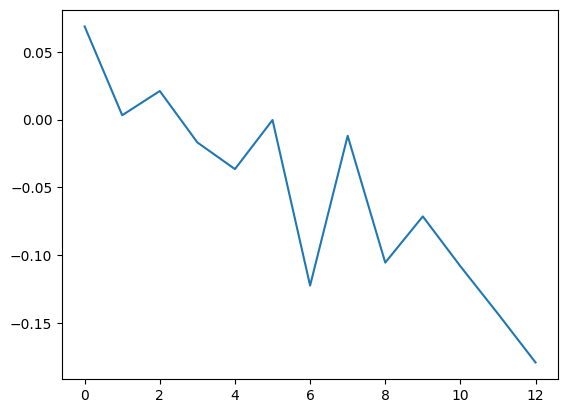

In [ ]:
N = len(y_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)
# Cálculo de errores simples
errores = y_ts.flatten()-y_pred.flatten()
plt.plot(errores);


In [ ]:
x_ts

In [ ]:
y_pred

array([[0.53210634, 0.51711494, 0.5036678 , 0.49004394]], dtype=float32)

In [ ]:
y_ts

array([[0.52914798, 0.73542601, 0.53363229, 0.30941704]])

In [ ]:
errores

In [ ]:
 y_pred = modelo.predict(x_vl,verbose=0)

In [ ]:
 y_pred = modelo.predict(x_ts,verbose=0)

In [ ]:
x_test=[[0.632,0.637,0.624,0.617,0.608,0.632,0.631,0.627,0,621,0.621,0,621,0.623,0.624]]
y_pred = modelo.predict(x_test,verbose=0)
y_pred

array([[0.533323  , 0.6743417 , 1.1662047 , 0.56861067, 0.7759787 ,
        0.8260756 , 0.6185746 , 0.16770308, 0.6943798 , 0.50029445,
        0.35993233, 0.6399545 , 1.0169559 ]], dtype=float32)

In [ ]:
x_pred=[[0.529148,0.735426,0.533632,0.309417]]
y_pred = modelo.predict(x_pred,verbose=0)
y_pred

array([[0.5051624 , 0.5091316 , 0.49464515, 0.48072106]], dtype=float32)

In [ ]:
#datos

datos_lstm=pd.read_excel("/content/datos_lstm_ocupados.xlsx")
datos_lstm

,periodo,ocupados
0,2010-04-01,62800.0
1,2010-07-01,64700.0
2,2010-10-01,66300.0
3,2011-01-01,66300.0
4,2011-04-01,66500.0
5,2011-07-01,69100.0
6,2011-10-01,66900.0
7,2012-01-01,66100.0
8,2012-04-01,65800.0
9,2012-07-01,67400.0


In [ ]:
datos_lstm['periodo'] = pd.to_datetime(datos_lstm['periodo'], format='%Y-%m-%d')
datos_lstm = datos_lstm.set_index('periodo')
datos_lstm = datos_lstm.asfreq('QS')
datos_lstm = datos_lstm.sort_index()
datos_lstm

,ocupados
periodo,
2010-04-01,62800.0
2010-07-01,64700.0
2010-10-01,66300.0
2011-01-01,66300.0
2011-04-01,66500.0
2011-07-01,69100.0
2011-10-01,66900.0
2012-01-01,66100.0
2012-04-01,65800.0


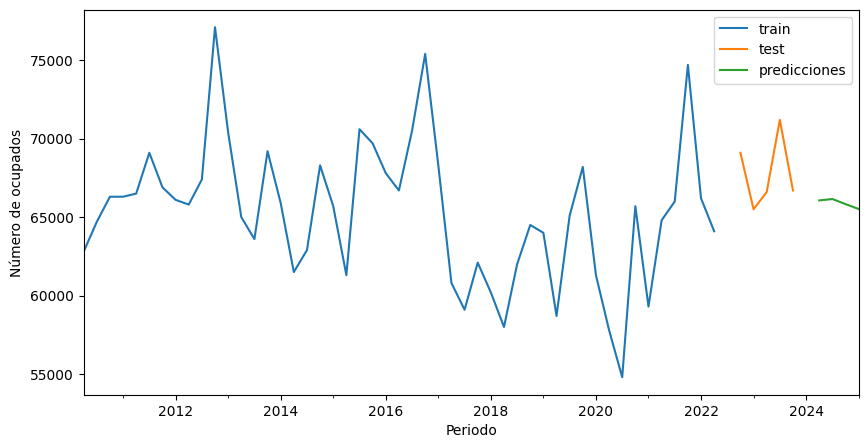

In [ ]:
# Gráfico de predicciones vs valores reales

fig, ax = plt.subplots(figsize=(10, 5))
(datos_lstm['ocupados'][0:49]).plot(ax=ax, label='train')
(datos_lstm['ocupados'][50:55]).plot(ax=ax, label='test')
(datos_lstm['ocupados'][56:]).plot(ax=ax, label='predicciones')
plt.xlabel('Periodo')
plt.ylabel('Número de ocupados')
ax.legend();